In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
url = 'SUNPHARMA_train.csv'
dataset_train = pd.read_csv(url)
x_training_set = dataset_train.iloc[:, 2:5].values
y_training_set = dataset_train.iloc[:,7:8].values


In [5]:
dataset_train.head()

,ID,Date,High,Low,Open,Close,Volume,Adj Close
0,SUNPHARMA,2018-04-02,510.000000,496.049988,500.899994,507.850006,2924481.0,499.449005
1,SUNPHARMA,2018-04-03,512.200012,504.500000,506.000000,510.000000,2709038.0,501.563416
2,SUNPHARMA,2018-04-04,514.950012,501.000000,514.950012,502.250000,3120925.0,493.941620
3,SUNPHARMA,2018-04-05,513.000000,505.100006,506.000000,507.549988,2409577.0,499.153931
4,SUNPHARMA,2018-04-06,515.299988,507.000000,508.000000,512.599976,2772128.0,504.120392


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
x_training_set_scaled = sc.fit_transform(x_training_set)
y_training_set_scaled = sc.fit_transform(y_training_set)

In [0]:
# selecting Feature Columns
feature_columns = ['Close']

In [0]:
# X_train = []
# y_train = []
# for i in range(60, 1995):
#   X_train.append(training_set_scaled[i-60:i, 0])
#   y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(x_training_set_scaled), np.array(y_training_set_scaled)
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [9]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(1, X_train.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_tr_t,Y_train,epochs=5,batch_size=32)

Epoch 1/5
247/247 [==============================] - 2s 7ms/step - loss: 0.2532
Epoch 2/5
247/247 [==============================] - 0s 199us/step - loss: 0.2264
Epoch 3/5
247/247 [==============================] - 0s 216us/step - loss: 0.1901
Epoch 4/5
247/247 [==============================] - 0s 181us/step - loss: 0.1392
Epoch 5/5
247/247 [==============================] - 0s 195us/step - loss: 0.0721


In [0]:
url = 'SUNPHARMA_test.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 7:8].values

In [0]:
x_testing_set = dataset_test.iloc[:,2:5].values
y_testing_set = dataset_test.iloc[:,7:8].values

In [0]:
x_testing_set_scaled = sc.fit_transform(x_testing_set)
y_testing_set_scaled = sc.fit_transform(y_testing_set)

In [0]:
X_test = np.array(x_testing_set_scaled)
X_ts_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [0]:
# dataset_total = pd.concat((dataset_train['<OPEN>'], dataset_test['<OPEN>']), axis = 0)
# inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# inputs = inputs.reshape(-1,1)
# inputs = sc.transform(inputs)
# X_test = []
# for i in range(60, 476):
  # X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_ts_t)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

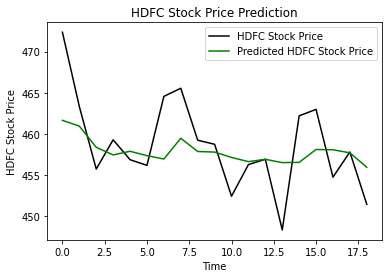

In [19]:
plt.plot(real_stock_price, color = 'black', label = 'HDFC Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted HDFC Stock Price')
plt.title('HDFC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HDFC Stock Price')
plt.legend()
plt.show()